# 自定义图像
常见图形种类和特点以及折线图的绘制流程，同时，在我们做课后练习的时候也发现了问题，例如：X轴、Y轴的刻度自定义，还有一个坐标系中绘制多个折线等问题。  

这节课就让我们一起来解决这些问题。  
![](./picture/10-1.png)
## 中文显示
相信大家在练习的时候也遇到过这样的问题，使用Matplotlib画的图居然不显示中文，作为中华儿女，真是气死我也。  
![](./picture/10-2.png)
实际上，matplotlib是支持unicode编码的，中文乱码的主要问题是没有找到合适的中文字体。  
如果想要Matplotlib显示中文我们可以使用三种方法：  
第一种：直接修改Matplotlib配置文件matplotlibrc   
第二种：动态修改配置   
第三种：设置自定义字体  

本节课我们将讲解第三种方法，因为自定义的字体自由度比较高，同时也方便我们在一个图中使用不同风格的字体。  
首先，我们下载了一个字体文件，文件的存储路径为/data/course_data/data_analysis/STSONG.TTF  

在给图片设置中文显示之前我们应该先添加下面的代码：  

In [ ]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')

from matplotlib import font_manager导入字体管理模块，font_manager.FontProperties()使用这个方法根据我提供的字体文件创建字体对象。  
当需要有中文显示的地方，添加字体属性就可以了。  

接下来我们通过一个代码来看一下，如何添加中文字体，运行下方代码：  

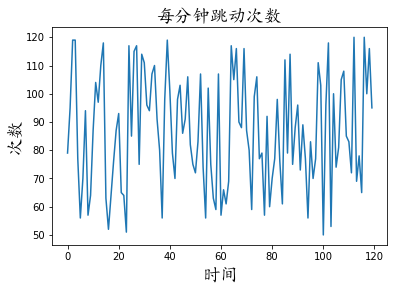

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager
import random
# 创建字体对象
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)
x = range(0,120)
y = [random.randint(50,120) for i in range(120)]
# 添加字体属性
plt.ylabel("次数",fontproperties=my_font)
plt.xlabel("时间",fontproperties=my_font)
# 设置标题
plt.title('每分钟跳动次数',fontproperties=my_font)
plt.plot(x,y)
plt.show()

从展示的图片发现我们已经成功的将中文添加上了，首先我们创建了一个字体对象，然后在需要添加中文的地方添加了fontproperties属性，只需两步就成功的将中文字体添加上了 。  

当然，我们在所有需要中文的地方添加的都是同一种字体，我们可以根据需求创建更多的字体对象，还可以通过size属性设置字体的大小，这样就可以让我们的图像中文显示的更加多样化。  

## 自定义X轴刻度
在上一节的第二个练习中，我们发现一个问题，x轴的刻度值全都重叠在一起了。  
![](./picture/10-3.png)
造成这个问题的原因是：  

1. 刻度的文字过长，但是图片的宽度不够。  
2. x轴和y轴刻度会默认根据x值和y值生成，并且Matplotlib默认会生成它认为合适的刻度间距。  

现在，我们先看看通过改变图片的大小能否解决重叠的问题。  
要想改变图像的大小，我们需要更改画布的大小来实现，matplotlib 中设置图形大小的语句如下：  
```
plt.figure(figsize=(a, b), dpi=dpi)
```
其中：   
figsize 设置图形的大小，a 为图形的宽， b 为图形的高，单位为英寸   
dpi 为设置图形每英寸的点数，即每英寸多少个像素  
下来我们试着改变图形的宽和高，看看效果：  


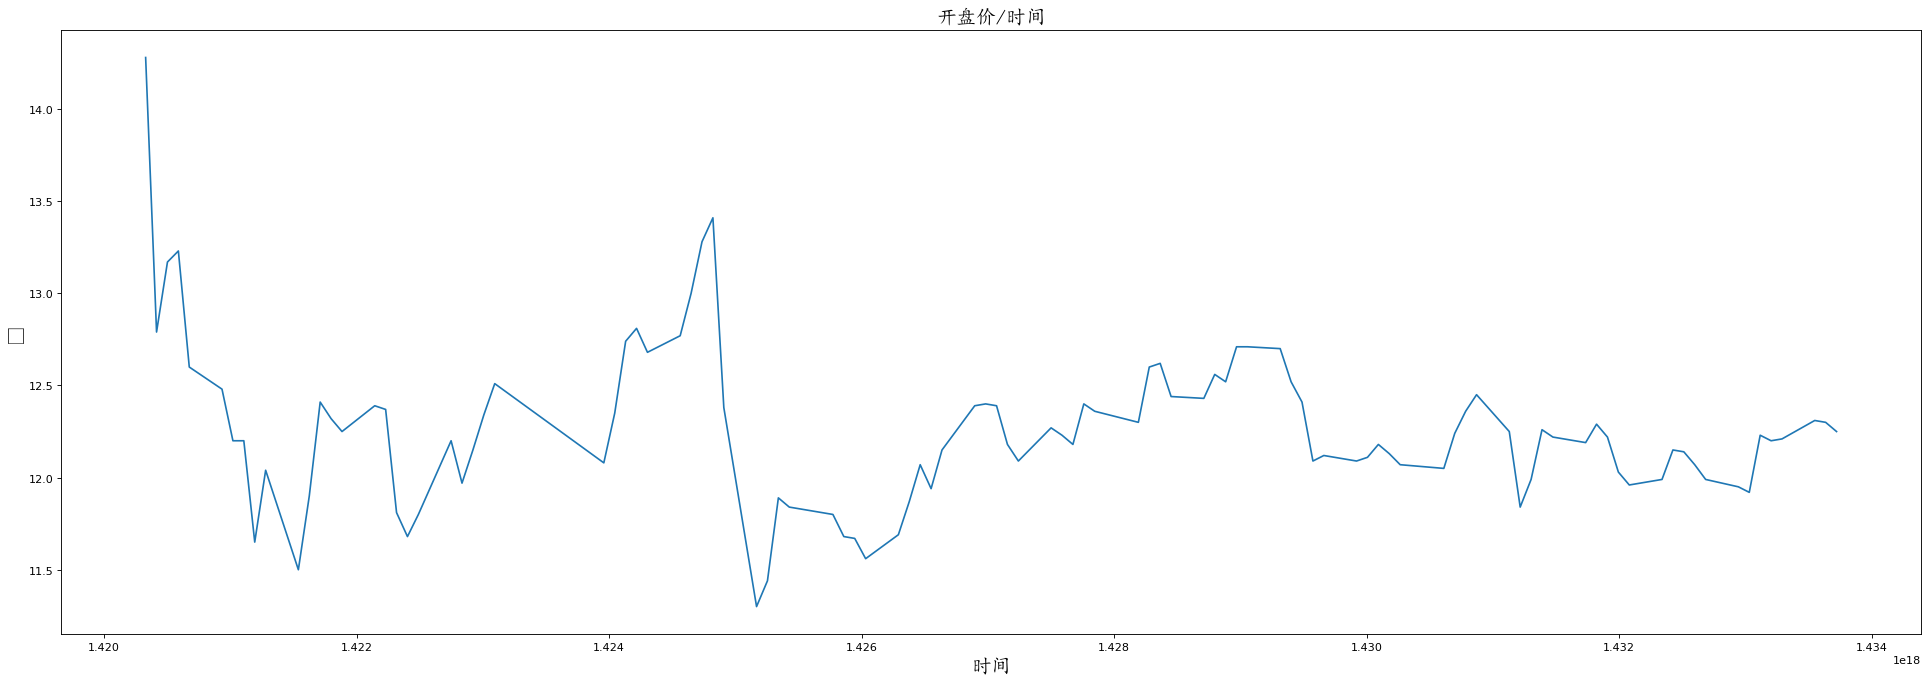

In [24]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
import random
# 创建字体对象
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)
df = pd.read_excel('./data/600001SH.xlsx')
df.head()
x = df['日期'].values.tolist()
y = df['开盘价(元)'].values.tolist()

plt.figure(figsize=(30, 10),dpi=80)

plt.plot(x,y) 
plt.xlabel('时间', fontproperties=my_font)
plt.ylabel("¥", fontproperties=my_font)
plt.title('开盘价/时间', fontproperties=my_font)
plt.show()

我们将图形的宽和高分别设置为20，10英寸，分辨率设置为80后发现，x轴的重叠的效果减轻一些，但还是会有严重的重叠。
  
那我们是不是还要继续修改宽和高呢，答案肯定是No，如果继续放大，图形会变的很大，不是我们想要的效果，
所以，并不是所有的刻度问题我们都可以使用改变图片的大小来解决。  
  
如果x轴的刻度我们能自己设置，岂不是完美了，我们可以根据自己的想法，对x轴刻度的疏密程度和刻度值进行设置。  
  
前面我们学习x轴的标题是使用plt.xlabel()这个方法，接下来我要使用plt.xticks()这个方法自定义x轴的刻度，
赶快拿出小本本记上笔记，千万不要把两个方法记混哦。  

代码片段
```
xticks(locs, [labels], **kwargs) 
```
locs参数为数组参数，表示x-axis的刻度线显示标注的地方，即ticks放置的地方     
第二个参数也为数组参数，表示在locs数组表示的位置添加的标签   

运行下面的代码，看看如何自定义x轴的刻度和刻度值：  

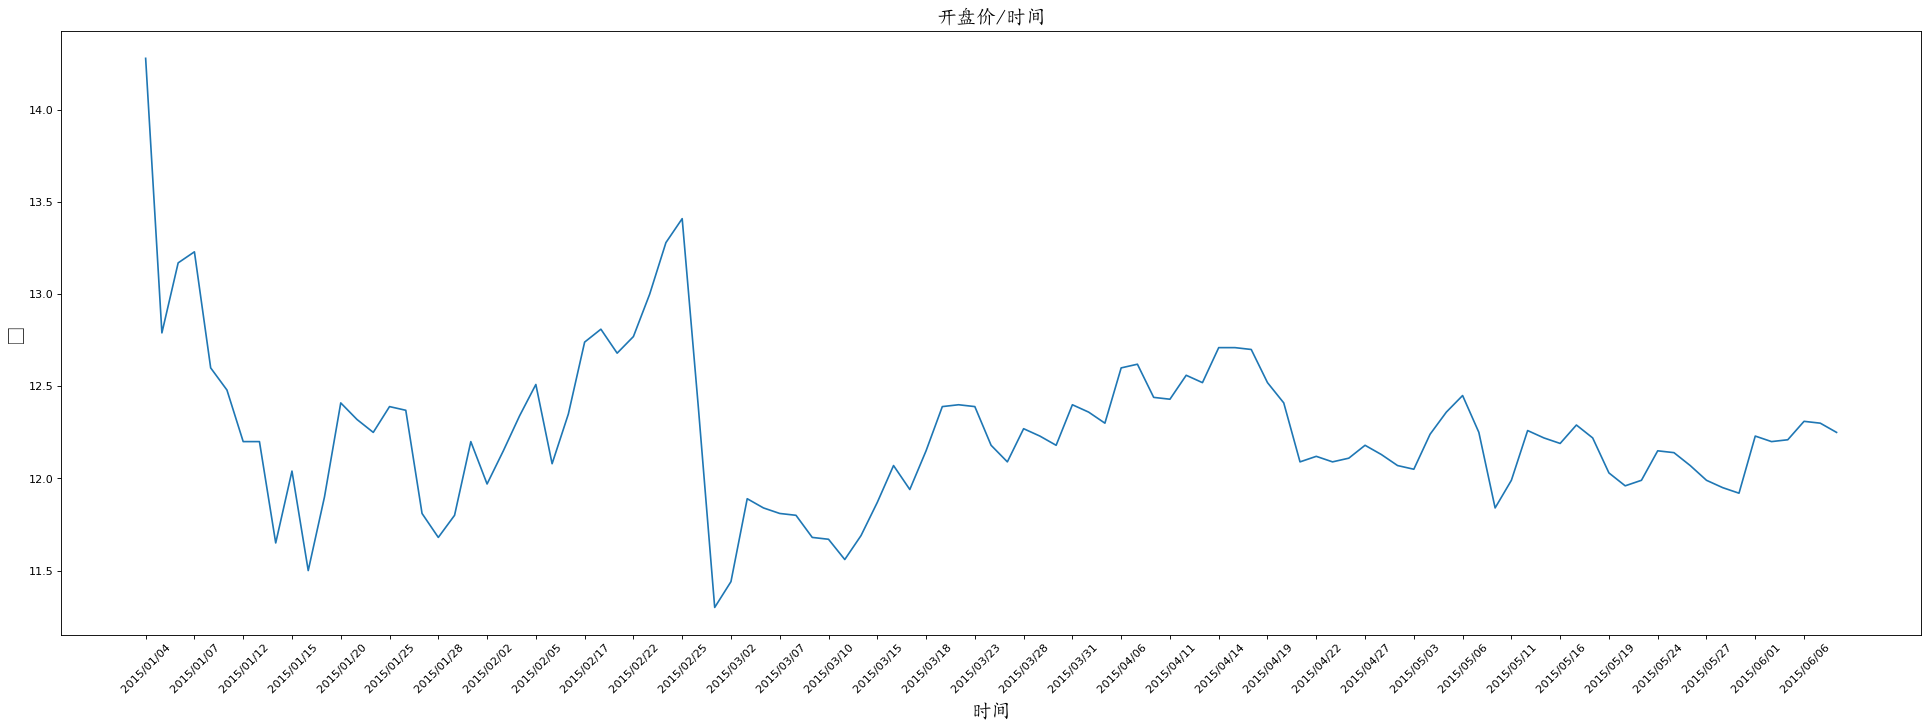

In [13]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
import random
# 创建字体对象
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=18)
df = pd.read_excel('./data/600001SH.xls')
df.head()
x = df['日期'].values.tolist()
y = df['开盘价(元)'].values.tolist()

plt.figure(figsize=(30, 10),dpi=80)

plt.plot(x,y) 
plt.xlabel('时间', fontproperties=my_font)
# 自定义x轴刻度显示
plt.xticks(range(0,len(x),3),x[::3],rotation=45)

plt.ylabel("¥", fontproperties=my_font)
plt.title('开盘价/时间', fontproperties=my_font)

plt.show()

我们把结果拿过来，对照图片一起分析代码的逻辑。  
![](./picture/10-4.png)
range(0,len(x),3)为xticks()的第一个参数，根据x值的个数调整x轴的刻度疏密程度。  
x[::3]为xticks()的第二个参数，还是使用x的值作为刻度的标签值，但是这里获取了其中的一部分，确保第一个参数和第二个参数的个数相同。  

rotation=45默认刻度的值是横向书写的，这样会有一定的重叠，所以我们将文字进行旋转操作，45位旋转的度数。  
通过上面的设置我们就可以轻松的对x轴刻度进行疏密调整，以及对应的刻度标签的设置。  

## 一图多线
通过以上学习，我们知道了如何自定义坐标轴的刻度。现在又提出一个需求，就是在上图中同时绘制出开盘价和收盘价。  

我们知道绘制一个折线的方法是plt.plot()方法，所以，我们可以猜想一个画布上绘制两条折线，是不是使用两次  plt.plot()方法就可以了呢？运行下方代码，验证我们的猜想：  

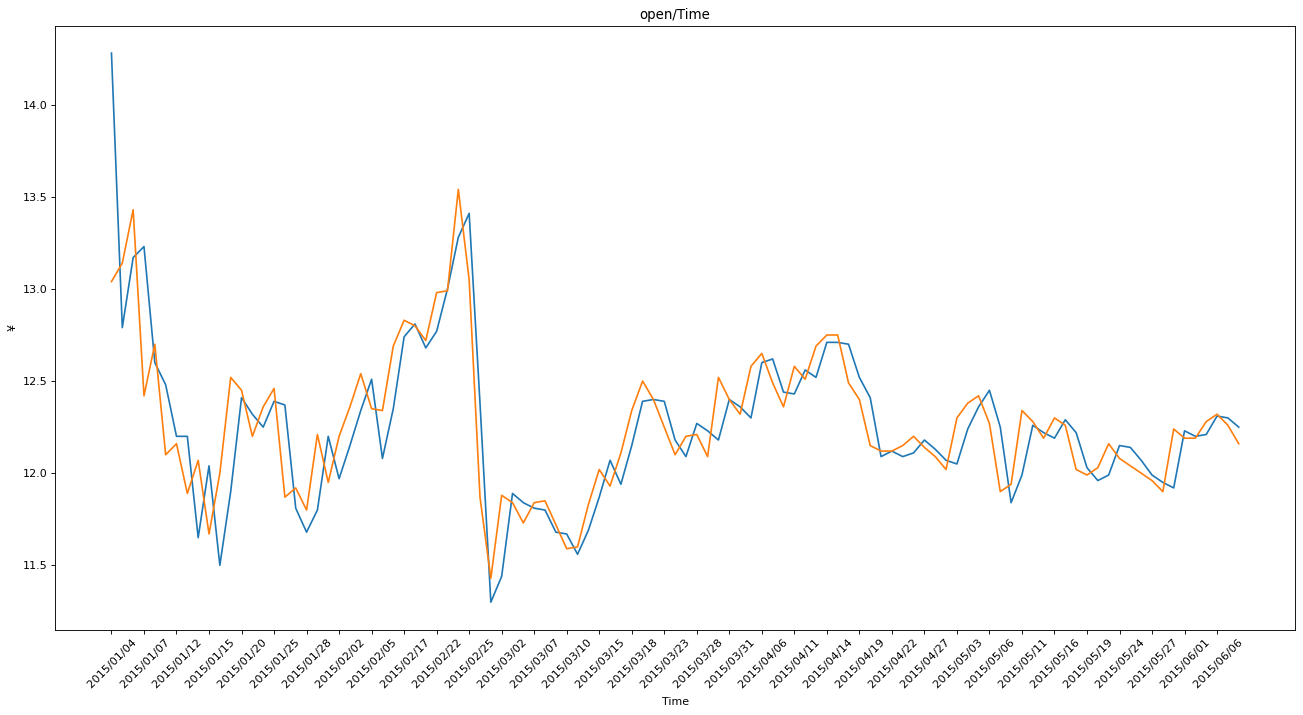

In [16]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel('./data/600001SH.xlsx')
df.head()
x = df['日期'].values.tolist()
y = df['开盘价(元)'].values.tolist()
z = df['收盘价(元)'].values.tolist()

plt.figure(figsize=(20, 10),dpi=80)
# 绘制开盘价折线
plt.plot(x,y) 
# 绘制收盘价折线
plt.plot(x,z) 

plt.xlabel('Time')
plt.ylabel("¥")
plt.title('open/Time')

plt.xticks(range(0,len(x), 3),x[::3],rotation=45)
plt.show()

哇塞，居然真的是这样的，一个坐标系中绘制两条折线，只需要使用两次plt.plot()方法就可以了。  
但是，通过图形大家有没有发现，我们并不知道哪条线是开盘价哪条线是收盘价，所以，我们应该在图像中添加对应的图例，从而标明每条线的作用是什么。  
plt.legend()方法就是图形添加图例的方法，但是这个方法比较特殊，一共需要两步才能成功的添加上图例，我们先运行下放代码，看一下图例的效果：  


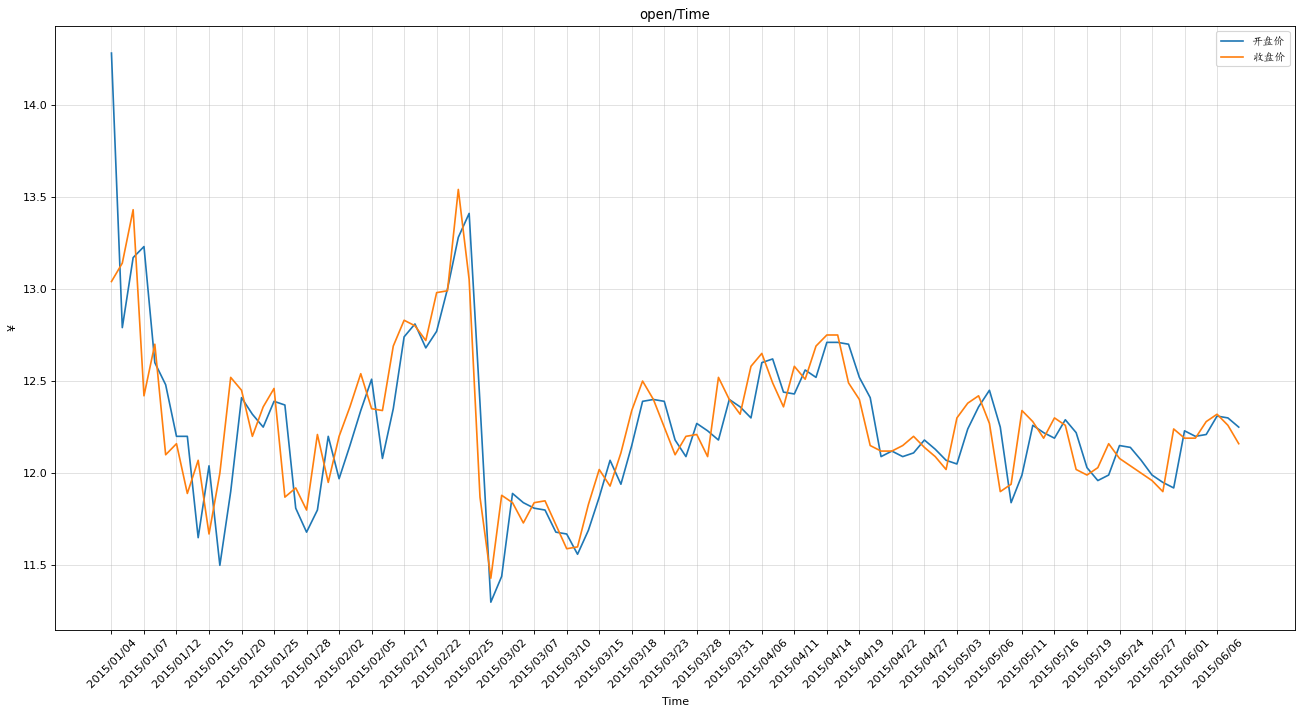

In [18]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')

df = pd.read_excel('./data/600001SH.xlsx')

x = df['日期'].values.tolist()
y = df['开盘价(元)'].values.tolist()
z = df['收盘价(元)'].values.tolist()

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(x,y,label='开盘价') 
plt.plot(x,z,label='收盘价') 
plt.xlabel('Time')
plt.ylabel("¥")
plt.title('open/Time')
# 添加图例
plt.legend(prop=my_font)

plt.xticks(range(0,len(x), 3),x[::3],rotation=45)
#alpha=0.4 设置透明度
plt.grid(alpha=0.4)

plt.show()

通过结果发现，在图形的右上角我们成功的添加上了图例。接下来，我们一起分析一下家图例的流程。  
plt.legend(prop=my_font)是添加图例的方法，prop=my_font参数是设置图例上中文显示的属性，另外一个比较重要的是，图例上显示的文字我们需要添加在plt.plot(x,y,label='开盘价')方法的label属性中。  
细心的同学会发现，结果中我们不仅添加上了图例，在图形中我们发现了很多网格。  
没错，代码中小k添加这这样一行代码plt.grid(alpha=0.4)，这行代码就是添加网格的效果，这里面的alpha=0.4是设置网格线的透明度，范围是（0~1）。  
绘制网格的作用就是为了辅助我们更好的观察数据的x值和y值。  
## 一图多个坐标系子图  
我们上面的学习都是在一个画布上创建一个坐标系，在上节课中我们介绍到一个画布上是可以分成多个区域，每个区域都可以绘制一个图像，这里的每个图像称为一个子图。  
调用plt.subplot()函数就可以在画布上创建一个子图，plt.subplot()的使用方法如下：  
代码片段
```
plt.subplot(nrows, ncols, index)
```
函数的 nrows 参数指定将数据图区域分成多少行；ncols 参数指定将数据图区域分成多少列；index 参数指定获取第几个区域。  
![](./picture/10-5.png)
Axes1、Axes2、Axes3、Axes4分别代表四个区域。  
运行下方代码，根据代码加深对子图的理解和绘图的方式：  

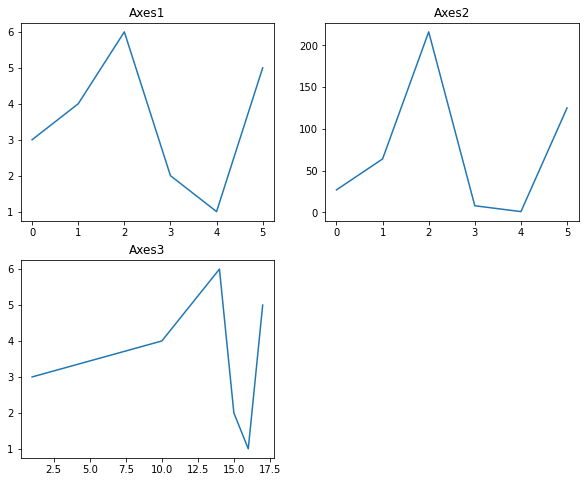

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
x = [1,10,14,15,16,17]
y = np.array([3,4,6,2,1,5])

plt.figure(figsize = (10,8))
# 第一个子图
# 折线图
plt.subplot(2, 2, 1)
plt.plot(y)
plt.title('Axes1')
#第二个子图
# 折线图，y轴每个数据的立方
plt.subplot(2, 2, 2)
plt.plot(y**3)
plt.title('Axes2')
#第三个子图
# 折线图，x轴和y轴均指定数据
plt.subplot(2, 2, 3)
plt.plot(x,y)
plt.title('Axes3')
plt.show()

上面我们创建一个包含2行2列，共4个子图。第一个子图的创建方法是plt.subplot(2, 2, 1)，第二个子图就使用：plt.subplot(2, 2, 2)，以此类推。
## 本节总结
今天的内容就告一段落了，在今天的课程中，我们学习了图形的中文显示、坐标轴刻度的自定义、一图多线以及一图多个坐标系等。最后，我们把本关的知识点总结一下：  
![](./picture/10-6.png)


## 题目要求
假设大家在30岁的时候，根据自己的实际情况，统计出来你和你同事各自从11岁到30岁每年交的男/女朋友的数量如列表y1和y2，请在一个图中绘制出该数据的折线图，从而分析每年交朋友的数量走势。
## 题目讲解
```
y1 = [1,0,1,1,2,4,3,4,4,5,6,5,4,3,3,1,1,1,1,1]
y2 = [1,0,3,1,2,2,3,4,3,2,1,2,1,1,1,1,1,1,1,1]
```
## 书写代码

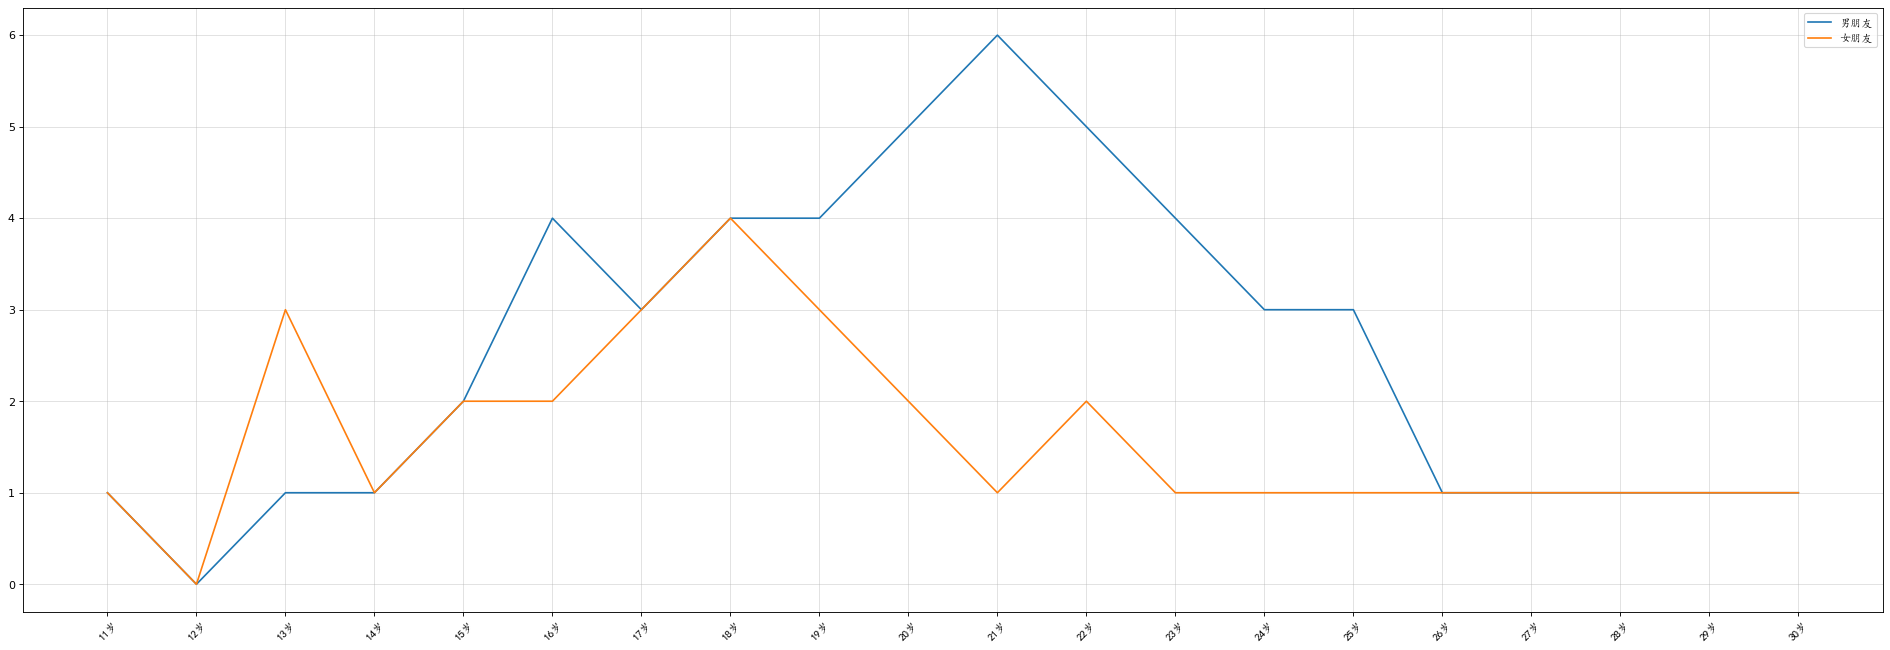

In [28]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')——
y1 = [1,0,1,1,2,4,3,4,4,5,6,5,4,3,3,1,1,1,1,1]
y2 = [1,0,3,1,2,2,3,4,3,2,1,2,1,1,1,1,1,1,1,1]
x = range(11, 31)

plt.figure(figsize=(30, 10), dpi=80)
plt.plot(x, y1, label="男朋友")
plt.plot(x, y2, label="女朋友")

#x 轴刻度意义
xtick_labels = ['{}岁'.format(i) for i in x]

#显示X中刻度
plt.xticks(x, xtick_labels,fontproperties = my_font, rotation=45)

#显示网格
plt.grid(alpha=0.4)
# 右上角显示标识线条的含义
plt.legend(prop=my_font)
plt.show()

## 题目要求
数据可视化的时候，常常需要将多个子图放在同一个画板上进行比较，那我们就来练习一下，在同一个画板上画出你还记得的数学函数图形。
## 题目讲解
例如：x的平方、x的立方、以及平方根等。
## 书写代码

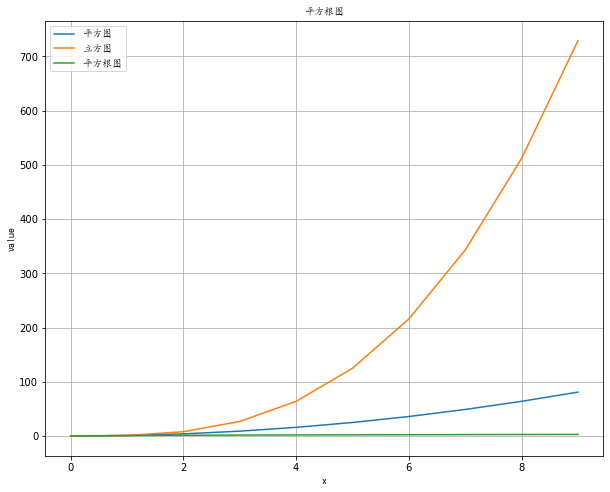

In [36]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')

import math

x = range(0,10)
y1 = [i**2 for i in range(0,10)]
y2 = [i**3 for i in range(0,10)]
y3 = [i**0.5 for i in range(0,10)]

plt.figure(figsize = (10,8))
plt.xlabel("x", fontproperties=my_font)
plt.ylabel("value", fontproperties=my_font)
# 第一个子图
# 平方图
# plt.subplot(2, 2, 1)
plt.plot(x,y1, label="平方图")
plt.title("平方图", fontproperties=my_font)
#第二个子图
# 立方图
# plt.subplot(2, 2, 2)
plt.plot(x,y2, label="立方图")
plt.title("立方图", fontproperties=my_font)
#第三个子图
# 平方根图
# plt.subplot(2, 2, 3)
plt.plot(x,y3,label="平方根图")
plt.grid()
plt.legend(prop=my_font)
plt.title("平方根图", fontproperties=my_font)

plt.show()